In [82]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
df = pd.read_csv(r'reviews.csv')

In [84]:
df.head()

,id,profileName,text,date,title,rating,images,helpful,Size,Color
0,RRNW8O8WKON3S,Tabby Katt,"Kids hats no longer fit, so we were searching ...","Reviewed in the United States on December 7, 2022",Little brother loves it!,5,NaN,3,One Size,Cadmium Green/Shadow Marl
1,R2H354V80I4Z9J,Redpawn3,This Carhartt Men's Knit Cuffed Beanie seems t...,"Reviewed in the United States on November 23, ...","Smaller than desired on large, big, larger, bi...",4,NaN,37,One Size,Black
2,R10JKN5868NJ7X,Drea,I want to start by saying this beanie is NOT t...,"Reviewed in the United States on December 9, 2022",Best beanie!,5,NaN,2,One Size,Black
3,RLZGCROKH1BY6,M,"As a fairly small-headed woman, this thing is ...","Reviewed in the United States on November 19, ...",Men’s… pifft,5,NaN,12,One Size,North Woods
4,RMCSIE5V8PXV3,KccaseyK,"This is my 2nd purchase of this hat, however, ...","Reviewed in the United States on October 31, 2015",Very comfortable and warm. Extra length to pro...,5,NaN,57,One Size,Black


5    4168
4     540
3     199
2      55
1      38
Name: rating, dtype: int64


<Axes: >

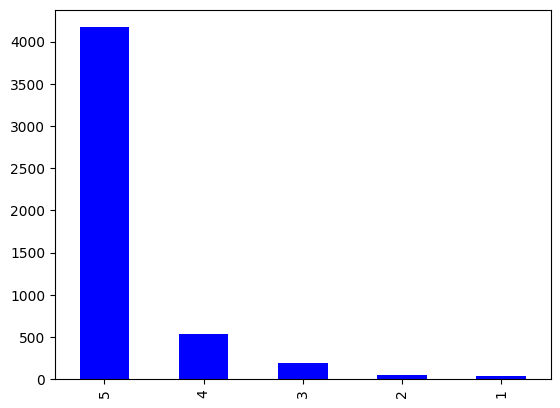

In [85]:
print(df['rating'].value_counts())
df['rating'].value_counts().plot.bar(color='blue')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5000 non-null   object
 1   profileName  5000 non-null   object
 2   text         4995 non-null   object
 3   date         5000 non-null   object
 4   title        4999 non-null   object
 5   rating       5000 non-null   int64 
 6   images       251 non-null    object
 7   helpful      5000 non-null   int64 
 8   Size         4998 non-null   object
 9   Color        4998 non-null   object
dtypes: int64(2), object(8)
memory usage: 390.8+ KB


In [87]:
df.isnull().sum()

id                0
profileName       0
text              5
date              0
title             1
rating            0
images         4749
helpful           0
Size              2
Color             2
dtype: int64

In [88]:
# Drop rows with missing values in the 'text' column
df.dropna(subset=['text'], inplace=True)

In [89]:
# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [90]:
df['reviews'] = df['text']
df['labels'] = df['rating'].apply(lambda x: 1 if x >=3 else 0)

In [91]:
df.head()

,id,profileName,text,date,title,rating,images,helpful,Size,Color,reviews,labels
0,RRNW8O8WKON3S,Tabby Katt,"Kids hats no longer fit, so we were searching ...","Reviewed in the United States on December 7, 2022",Little brother loves it!,5,NaN,3,One Size,Cadmium Green/Shadow Marl,"Kids hats no longer fit, so we were searching ...",1
1,R2H354V80I4Z9J,Redpawn3,This Carhartt Men's Knit Cuffed Beanie seems t...,"Reviewed in the United States on November 23, ...","Smaller than desired on large, big, larger, bi...",4,NaN,37,One Size,Black,This Carhartt Men's Knit Cuffed Beanie seems t...,1
2,R10JKN5868NJ7X,Drea,I want to start by saying this beanie is NOT t...,"Reviewed in the United States on December 9, 2022",Best beanie!,5,NaN,2,One Size,Black,I want to start by saying this beanie is NOT t...,1
3,RLZGCROKH1BY6,M,"As a fairly small-headed woman, this thing is ...","Reviewed in the United States on November 19, ...",Men’s… pifft,5,NaN,12,One Size,North Woods,"As a fairly small-headed woman, this thing is ...",1
4,RMCSIE5V8PXV3,KccaseyK,"This is my 2nd purchase of this hat, however, ...","Reviewed in the United States on October 31, 2015",Very comfortable and warm. Extra length to pro...,5,NaN,57,One Size,Black,"This is my 2nd purchase of this hat, however, ...",1


1    4902
0      93
Name: labels, dtype: int64


<Axes: >

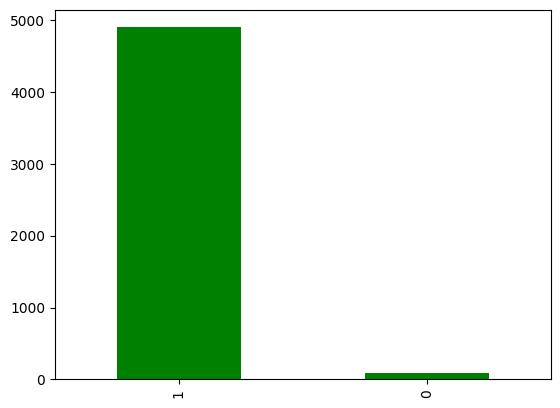

In [92]:
print(df['labels'].value_counts())
df['labels'].value_counts().plot.bar(color='green')

In [93]:
# Dependent Features
y = df['labels']

# Independent Features
X = df['reviews']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [96]:
# Train Naive Bayes Classifier (NBC)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [97]:
nb_predictions = nb_classifier.predict(X_test_tfidf)

In [98]:
# Evaluate performance
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, pos_label=1)
nb_recall = recall_score(y_test, nb_predictions, pos_label=1)
nb_f1 = f1_score(y_test, nb_predictions, pos_label=1)

In [99]:
print("Multinomial Naive Bayes Accuracy:", nb_accuracy)
print("Multinomial Naive Bayes Precision (positive):", nb_precision)
print("Multinomial Naive Bayes Recall (positive):", nb_recall)
print("Multinomial Naive Bayes F1-score (positive):", nb_f1)

Multinomial Naive Bayes Accuracy: 0.97997997997998
Multinomial Naive Bayes Precision (positive): 0.97997997997998
Multinomial Naive Bayes Recall (positive): 1.0
Multinomial Naive Bayes F1-score (positive): 0.9898887765419616


In [100]:
# Create and train Linear SVC model
svc_classifier = LinearSVC()
svc_classifier.fit(X_train_tfidf, y_train)

LinearSVC()

In [101]:
svc_predictions = svc_classifier.predict(X_test_tfidf)

In [102]:
# Evaluate performance
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions, pos_label=1)
svc_recall = recall_score(y_test, svc_predictions, pos_label=1)
svc_f1 = f1_score(y_test, svc_predictions, pos_label=1)

In [103]:
print("Linear Support Vector Classifier Accuracy:", svc_accuracy)
print("Linear Support Vector Classifier Precision (positive):", svc_precision)
print("Linear Support Vector Classifier Recall (positive):", svc_recall)
print("Linear Support Vector Classifier F1-score (positive):", svc_f1)

Linear Support Vector Classifier Accuracy: 0.982982982982983
Linear Support Vector Classifier Precision (positive): 0.9829317269076305
Linear Support Vector Classifier Recall (positive): 1.0
Linear Support Vector Classifier F1-score (positive): 0.9913924050632912


In [104]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [105]:
tokenizer_lstm = keras.preprocessing.text.Tokenizer()
tokenizer_lstm.fit_on_texts(X_train)  # Use X_train, not X_train_tfidf
X_train_seq = tokenizer_lstm.texts_to_sequences(X_train)
X_val_seq = tokenizer_lstm.texts_to_sequences(X_test)

In [106]:
num_classes = 2

X_train_padded = keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=100)
X_val_padded = keras.preprocessing.sequence.pad_sequences(X_val_seq, maxlen=100)

model_lstm = keras.Sequential([
    keras.layers.Embedding(input_dim=len(tokenizer_lstm.word_index) + 1, output_dim=128, input_length=100),
    keras.layers.LSTM(64),
    keras.layers.Dense(num_classes, activation='softmax')
])
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train_padded, y_train_encoded, validation_data=(X_val_padded, y_test_encoded), epochs=5, batch_size=32)

_, accuracy_lstm = model_lstm.evaluate(X_val_padded, y_test_encoded)

Epoch 1/5
125/125 [==============================] - 19s 135ms/step - loss: 0.1283 - accuracy: 0.9747 - val_loss: 0.0858 - val_accuracy: 0.9800
Epoch 2/5
125/125 [==============================] - 10s 82ms/step - loss: 0.0565 - accuracy: 0.9830 - val_loss: 0.0688 - val_accuracy: 0.9800
Epoch 3/5
125/125 [==============================] - 6s 50ms/step - loss: 0.0224 - accuracy: 0.9947 - val_loss: 0.1010 - val_accuracy: 0.9820
Epoch 4/5
125/125 [==============================] - 4s 30ms/step - loss: 0.0100 - accuracy: 0.9977 - val_loss: 0.0888 - val_accuracy: 0.9800
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.1047 - accuracy: 0.9830


In [107]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
X_train_encoded = tokenizer(X_train.tolist(), padding='max_length', truncation=True, max_length=100, return_tensors='tf')
X_test_encoded = tokenizer(X_test.tolist(), padding='max_length', truncation=True, max_length=100, return_tensors='tf')

In [108]:
# Build and train your BERT-based model
model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model_bert.compile(optimizer=optimizer, loss=loss, metrics=[metric])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model_bert.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_val_padded, y_test_encoded))

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
125/125 [==============================] - 132s 701ms/step - loss: 0.1136 - accuracy: 0.9812 - val_loss: 0.0925 - val_accuracy: 0.9800
Epoch 2/5
125/125 [==============================] - 87s 700ms/step - loss: 0.0913 - accuracy: 0.9817 - val_loss: 0.0936 - val_accuracy: 0.9800
Epoch 3/5
125/125 [==============================] - 87s 699ms/step - loss: 0.0881 - accuracy: 0.9817 - val_loss: 0.0878 - val_accuracy: 0.9800
Epoch 4/5
125/125 [==============================] - 88s 701ms/step - loss: 0.0824 - accuracy: 0.9817 - val_loss: 0.0907 - val_accuracy: 0.9800
Epoch 5/5
125/125 [==============================] - 87s 698ms/step - loss: 0.0760 - accuracy: 0.9817 - val_loss: 0.0966 - val_accuracy: 0.9800
